In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [2]:
# Load the data
df_train = pd.read_csv('../data/train.csv')

# Replace -1 with NaN, as they are missing values
df_nan = df_train.replace(-1, np.NaN)

In [3]:
nbr_missing = df_nan.isnull().sum().sort_values(ascending=False)
# Percent missing values
print(nbr_missing[nbr_missing > 0] / df_nan.shape[0] * 100)

ps_car_03_cat    69.089837
ps_car_05_cat    44.782531
ps_reg_03        18.106490
ps_car_14         7.160474
ps_car_07_cat     1.930237
ps_ind_05_cat     0.975955
ps_car_09_cat     0.095596
ps_ind_02_cat     0.036290
ps_car_01_cat     0.017977
ps_ind_04_cat     0.013945
ps_car_02_cat     0.000840
ps_car_11         0.000840
ps_car_12         0.000168
dtype: float64


In [4]:
# Chosen to drop all columns that have more than 10 % missing (and also id as it will probably not be very useful)
drop_cols = ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03', 'id']

# Taking easy way out by dropping all the rows with missing values. 
# Probably not very good as we lose about 50000 (10% data) entries
df_dropped = df_nan.drop(drop_cols, axis=1).dropna()

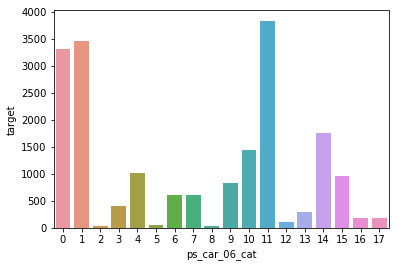

In [5]:
bob = df_dropped[['target', 'ps_car_06_cat']].groupby(['ps_car_06_cat'],as_index=False).sum()

sns.barplot(x='ps_car_06_cat', y='target', data = bob)

# Analyse categorical data

In [6]:
cate_cols = [col for col in list(df_dropped) if col.endswith('_cat')]
df_cate = df_dropped[cate_cols]

# Check if there are any non int values in the categories
for col in cate_cols:
    temp = df_cate[col]
    temp = temp[temp % 1 != 0]
    if temp.size == 0:
        df_cate[col] = df_cate[col].astype('int')
# No ints, so change all the columns into int type
df_cate.describe()

E:\Programs\Anaconda\envs\ml\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
count,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000,541860.000000
mean,1.355529,0.418163,0.417892,8.256677,0.835694,0.670930,6.579528,0.947128,0.852108,1.313926,0.992024,61.908004
std,0.664114,0.493258,1.348684,2.511052,0.370554,2.058453,5.465019,0.223777,0.354994,0.981970,0.092353,32.856706
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000
50%,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,64.000000
75%,2.000000,1.000000,0.000000,11.000000,1.000000,0.000000,11.000000,1.000000,1.000000,2.000000,1.000000,92.000000
max,4.000000,1.000000,6.000000,11.000000,1.000000,9.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000


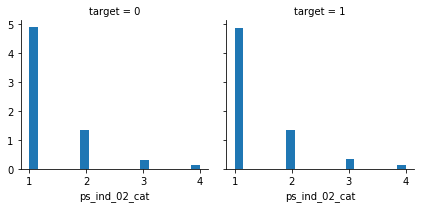

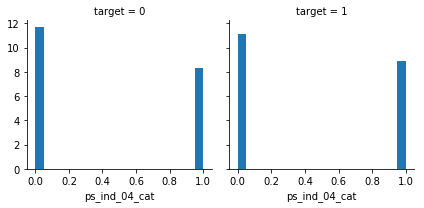

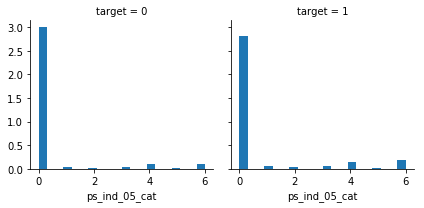

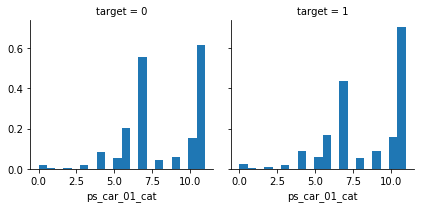

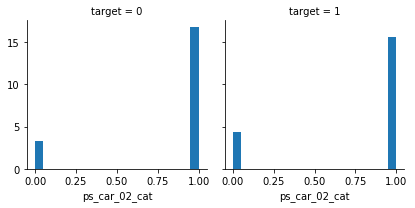

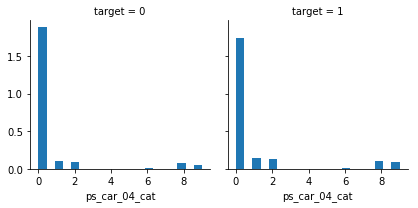

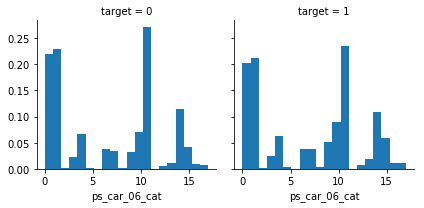

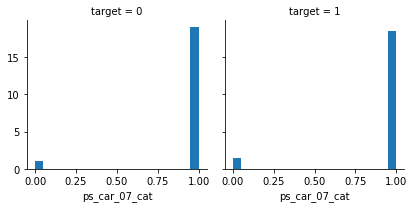

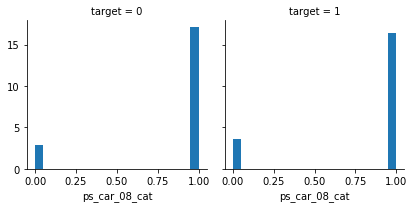

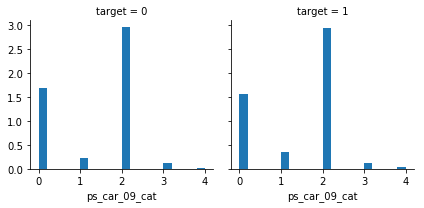

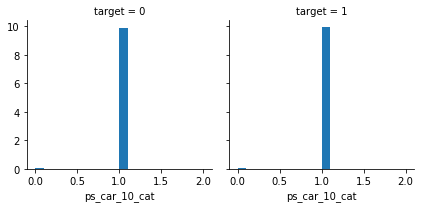

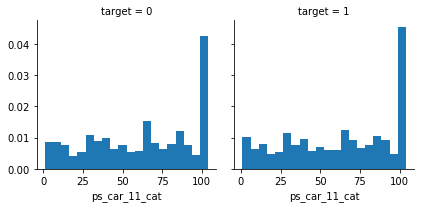

In [20]:
for col in cate_cols:
    plot = sns.FacetGrid(df_dropped, col='target')
    plot.map(plt.hist, col, bins=20, normed=True)

In [29]:
for col in cate_cols:
    bob = df_dropped[[col, 'target']].groupby([col], as_index=False).count().sort_values(by='target', ascending=False)
    display(df_dropped[[col, 'target']].groupby([col], as_index=False).count().sort_values(by='target', ascending=False) / df_dropped.shape[0])

,ps_ind_02_cat,target
0,0.000002,0.731060
1,0.000004,0.201722
2,0.000006,0.047848
3,0.000007,0.019370


,ps_ind_04_cat,target
0,0.000000,0.581837
1,0.000002,0.418163


,ps_ind_05_cat,target
0,0.000000,0.896241
6,0.000011,0.034972
4,0.000007,0.031150
1,0.000002,0.014022
3,0.000006,0.013874
2,0.000004,0.006963
5,0.000009,0.002777


,ps_car_01_cat,target
11,0.000020,0.341059
7,0.000013,0.302822
6,0.000011,0.109927
10,0.000018,0.085690
4,0.000007,0.045789
9,0.000017,0.032361
5,0.000009,0.028950
8,0.000015,0.025763
3,0.000006,0.011320
0,0.000000,0.010440


,ps_car_02_cat,target
1,0.000002,0.835694
0,0.000000,0.164306


,ps_car_04_cat,target
0,0.000000,0.842858
1,0.000002,0.048708
2,0.000004,0.042965
8,0.000015,0.034096
9,0.000017,0.026584
6,0.000011,0.002469
3,0.000006,0.001165
5,0.000009,0.000613
4,0.000007,0.000301
7,0.000013,0.000242


,ps_car_06_cat,target
11,0.000020,0.228923
1,0.000002,0.193749
0,0.000000,0.186410
14,0.000026,0.097503
10,0.000018,0.061073
4,0.000007,0.055852
15,0.000028,0.035404
6,0.000011,0.031966
7,0.000013,0.028996
9,0.000017,0.028552


,ps_car_07_cat,target
1,0.000002,0.947128
0,0.000000,0.052872


,ps_car_08_cat,target
1,0.000002,0.852108
0,0.000000,0.147892


,ps_car_09_cat,target
2,0.000004,0.589095
0,0.000000,0.336554
1,0.000002,0.046058
3,0.000006,0.023495
4,0.000007,0.004798


,ps_car_10_cat,target
1,0.000002,0.991407
0,0.000000,0.008284
2,0.000004,0.000308


,ps_car_11_cat,target
101,0.000192,0.131623
100,0.000190,0.043747
62,0.000118,0.039853
84,0.000161,0.031026
26,0.000052,0.022844
4,0.000009,0.022545
30,0.000059,0.021948
96,0.000183,0.021747
63,0.000120,0.019898
80,0.000153,0.017440


<class 'pandas.core.frame.DataFrame'>
Int64Index: 541860 entries, 0 to 595211
Data columns (total 12 columns):
ps_ind_02_cat    541860 non-null int32
ps_ind_04_cat    541860 non-null int32
ps_ind_05_cat    541860 non-null int32
ps_car_01_cat    541860 non-null int32
ps_car_02_cat    541860 non-null int32
ps_car_04_cat    541860 non-null int32
ps_car_06_cat    541860 non-null int32
ps_car_07_cat    541860 non-null int32
ps_car_08_cat    541860 non-null int32
ps_car_09_cat    541860 non-null int32
ps_car_10_cat    541860 non-null int32
ps_car_11_cat    541860 non-null int32
dtypes: int32(12)
memory usage: 48.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 541860 entries, 0 to 595211
Data columns (total 12 columns):
ps_ind_02_cat    541860 non-null int32
ps_ind_04_cat    541860 non-null int32
ps_ind_05_cat    541860 non-null int32
ps_car_01_cat    541860 non-null int32
ps_car_02_cat    541860 non-null int32
ps_car_04_cat    541860 non-null int32
ps_car_06_cat    541860 non-nul

None

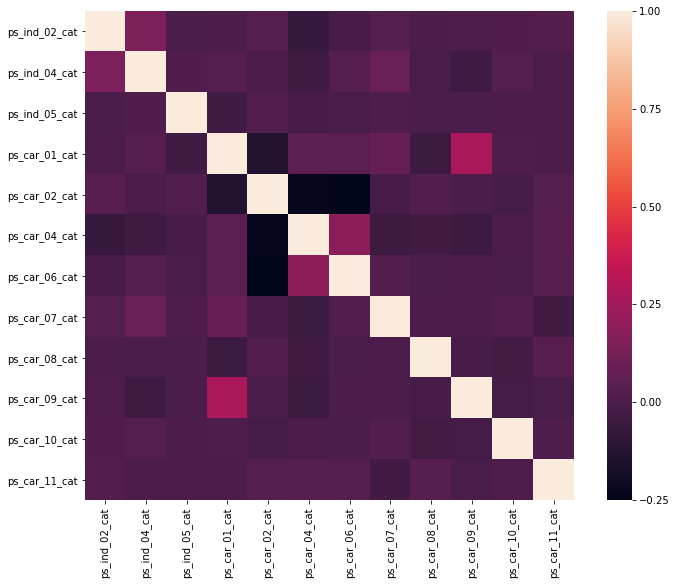

In [32]:
#correlation matrix
corrmat = df_cate.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);
print(bob.info())
display(df_cate.info())

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap (including saleprice)
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()